# S&P500 Stock Price Indicator
Group Members: Pranav Chavali, Tejas Iyer, Pranav Peddamalla, Adithya Pradosh

# Introduction
The main purpose of this project is to journey through the entirety of the data science life cycle. To accomplish this we have chosen to use a data set which keeps track of S&P500 stock prices from 2014 to 2017 with an attempt to create a predictor/indicator for a particular stock. Stock trading is a prevalent occupation around the world and traders use a plethora of indicators such as RSI (relative strength index), ADI (Average directional index), and many others

This is important because it has direct effects on our economy. If an indicator with high accuracy can be made this will benefit both businesses and the trader as they both will be making profits. We have also seen the negative side to this where people lose their money and we want to prevent this by creating an accurate indicator. This can be accomplished by using a large dataset which displays the historical changes for a given stock. By analyzing past trends in the market, we can begin to predict future market growth and create indicators that better fit to our data

Although, we note that it is important to consider that stock predictors are seldom as accurate as they are intended to be. After all, if it was easy to predict the price of stocks, everyone would be a millionaire. 

There are a number of different factors that play into affecting the price of a stock. A number of these factors are intangible, and unable to be measured or manipulated as quantitative data. One example of this is news regarding a stock: when new information regarding a company is released to the public, it can have a significant impact on its stock price. After all, the price of a stock directly reflects the trust and confidence that investors have in a given product at a given time. So if news comes out which influences an investors thoughts on whether to hold or sell, this can be directly reflected in the stock price as investor’s confidence in a stock beings to either waver or intensify. 

With this being said, our project intends to compare a number of well performing stocks from the S&P500, an index containing the top 500 leading publicly-traded companies in the USA to each other, as well as the S&P500 itself. Afterwords, we train a model using [INSERT MODEL HERE] to predict future stock price trends for a select few companies. 

For the companies, we chose to narrow down on 4 companies which are Apple, Starbucks, Amazon and Microsoft. These are very well known companies which majority of people know about. Apple and Microsoft are leading tech companies, Starbucks is one of the worlds leading coffee shops and Amazon is the leading e-commerce store in the world.

Throughout this project, we will go through the following stages (each item in this list will link to its respective code segments)
1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Model: Analysis, Hypothesis, & ML
5. Interpretation: Insight & Policy Decision

In [ ]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

This code performs data collection and preprocessing for multiple stocks, including S&P 500, Apple, Starbucks, Amazon, and Microsoft. It reads CSV files containing historical stock price data for each company and removes any rows with missing values using dropna. It also scrapes the S&P 500 historical prices table from a website and stores the data in a pandas DataFrame called sp_data. Overall, this code aims to gather and clean stock price data for further analysis or modeling.

#Data Collection:

#### Data Collection for Explanatory Analysis and Data Visualization:

As seen below we are collecting data from multiple CSV files which is historical stock price data for comapanies such as Apple, Amazon, Starbucks and Microsoft as well as the S&P 500. We are also dropping all NA values for each data set to make sure all values we work with are valid values since NA values can interfere with computations. For the S&P 500 data we web scrape this off 'multpl' to get the historical S&P500 data. After obtaining the table from this website we create a pandas dataframe with columns Data and Price
* https://www.multpl.com/s-p-500-historical-prices/table/by-month

In [ ]:
# s&p data
sp = pd.read_csv('stock prices.csv')
sp = sp.dropna()

# apple data
apple = pd.read_csv('apple five year data.csv')
apple = apple.dropna()

# starbucks data
starbucks = pd.read_csv('starbucks five year data.csv')
starbucks = starbucks.dropna()

# amazon data
amazon = pd.read_csv('amazon five year data.csv')
amazon = amazon.dropna()

# microsoft data
microsoft = pd.read_csv('microsoft five year data.csv')
microsoft = microsoft.dropna()

# web scraping s&p changes over years
url = 'https://www.multpl.com/s-p-500-historical-prices/table/by-month'
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
r = requests.get(url, headers=headers)

page = BeautifulSoup(r.content, 'lxml')
sp_data = pd.read_html(str(page.find('table')))[0]
sp_data.columns = ['Date', 'Price']
sp_data.index = sp_data.index + 1

#### Data Collection For Machine Learning:

Reading in CSV files for the historic data for both Apple and Amazon which are later used in the Machine Learning model

Apple Data:

In [ ]:
# Get the Dataset
dataset = pd.read_csv('HistoricalData_1683500505754.csv')


Amazon Data:

In [ ]:
# Get the Dataset
dataset2 = pd.read_csv('HistoricalData_1683662795655.csv')


# Data Preprocessing:

The code here performs are more extensive analysis on the data we collected in the previous cell. We take the data from each company and construct plots/tables about specific aspects regarding each company. For the plots, we plot the average close/last price over the last 5 years to see the companies overall improvement. In the tables at the end, we show each companies close/last price currently and their market cap which provides us more insights regarding the company. 

#### Data Pre Processing For Explanatory Data Analysis and Data Visualization:

In the following cells we are cleaning each data set by stripping the MM/DD parts of each date since we only care about the year. Once we get the year from each date we add this as a new column called 'Year.' This makes the plots a lot easier to create since we can create temporary dataframes for each year and find the average closing price for each company

In [ ]:
# all the pre processing done for Apple data set
apple_dates = list(apple['Date'])
apple_years = []

# adding all the years stripping out the MM/DD/ part of the date
for date in apple_dates:
  apple_years.append(date[6::])

# adding the new column to data set
apple['Year'] = apple_years
apple = apple[['Year', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# getting all the average close/last prices and storing in an array
apple_avgs = []
for year in sorted(set(apple_years)):
  total = 0
  # temp data set which corresponds to each year in the 5 year average
  temp = apple.loc[apple['Year'] == str(year)]
  close_last = list(temp['Close/Last'])
  for val in close_last:
    total += float(val[1::])

  apple_avgs.append(total / len(close_last))

In [ ]:
# all the pre processing done for Starbucks data set
starbucks_dates = list(starbucks['Date'])
starbucks_years = []

# adding all the years stripping out the MM/DD/ part of the date
for date in starbucks_dates:
  starbucks_years.append(date[6::])

# adding the new column to data set
starbucks['Year'] = starbucks_years
starbucks = starbucks[['Year', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# getting all the average close/last prices and storing in an array
starbucks_avgs = []
for year in sorted(set(starbucks_years)):
  total = 0
  # temp data set which corresponds to each year in the 5 year average
  temp = starbucks.loc[starbucks['Year'] == str(year)]
  close_last = list(temp['Close/Last'])
  for val in close_last:
    total += float(val[1::])

  starbucks_avgs.append(total / len(close_last))

In [ ]:
# all the pre processing done for Amazon data set
amazon_dates = list(amazon['Date'])
amazon_years = []

# adding all the years stripping out the MM/DD/ part of the date
for date in amazon_dates:
  amazon_years.append(date[6::])

# adding the new column to data set
amazon['Year'] = amazon_years
amazon = amazon[['Year', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# getting all the average close/last prices and storing in an array
amazon_avgs = []
for year in sorted(set(amazon_years)):
  total = 0
  # temp data set which corresponds to each year in the 5 year average
  temp = amazon.loc[amazon['Year'] == str(year)]
  close_last = list(temp['Close/Last'])
  for val in close_last:
    total += float(val[1::])

  amazon_avgs.append(total / len(close_last))

In [ ]:
# all the pre processing done for Microsoft data set
microsoft_dates = list(microsoft['Date'])
microsoft_years = []

# adding all the years stripping out the MM/DD/ part of the date
for date in microsoft_dates:
  microsoft_years.append(date[6::])

# adding the new column to data set
microsoft['Year'] = microsoft_years
microsoft = microsoft[['Year', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# getting all the average close/last prices and storing in an array
microsoft_avgs = []
for year in sorted(set(microsoft_years)):
  total = 0
  # temp data set which corresponds to each year in the 5 year average
  temp = microsoft.loc[microsoft['Year'] == str(year)]
  close_last = list(temp['Close/Last'])
  for val in close_last:
    total += float(val[1::])

  microsoft_avgs.append(total / len(close_last))

This code here cleans the S&P 500 price data frame to obtain the years 2018-2023 to remain consistent with the companies years chosen. This is done to get a 5 year average plot of the S&P 500 so we can see how the overall market has been doing compared to each individual company

In [ ]:
pd.options.mode.chained_assignment = None

# Cleaning/Filtering through the S&P Data to get the relevant information we need
sp_dates = list(sp_data['Date'])
sp_years = []
for date in sp_dates:
  # stripping the MM/DD part of the date to get just the years
  sp_years.append(date[-4:])

# adding the column to the dataframe to be used in later computation
sp_data['Year'] = sp_years
# converting all years to ints
sp_data['Year'] = sp_data['Year'].astype(int)
# dropping all columns that are before 2018
sp_data = sp_data[sp_data['Year'] >= 2018]

# getting the five year average price increase for the S&P 500
sp_fives = list(sp_data['Year'])
sp_avgs = []
for year in sorted(set(sp_fives)):
  total = 0
  temp = sp_data.loc[sp_data['Year'] == year]
  prices = list(temp['Price'])
  for price in prices:
    total += float(price)

  # list of averages
  sp_avgs.append(total / len(prices))

#### Data Pre Processing For ML and Hyothesis Testing:

Here we will be preprocessing the values in our dataset. A number of the stock price columns across all of our datasets seem to be prepended by a '\$' symbol (ex. \$107.4). This symbol makes it difficult to treat the stock price values as float values that can be easily compared with each other. This function can be passed in to the .apply function to modify the columns of our choice to remove the prepended '\$' symbol. 

In [ ]:
def process_values(money_val):
  # remove the $ sign (pre processing)
  corrected_val = str(money_val)[1:]
  return float(corrected_val)

Here we further pre-process for the ML Model. As it stands, the dataset is hard to read and not very conducive to being easily read. For this reason, we will be making the dataframe nicer to look at. We will be changing the name of the Close/Last colum to just close because it is easier to read. Furthermore, we will rearrange the order of the columns in the dataframe to be 'Date', 'Open', 'High', 'Low', 'Close', then 'Volume'.  Lastly we will be applying the function that we created previously which removes the '\$' symbol from the stock price columns in the dataframe in order to remove the '\$' symbol from the appropriate columns in the dataframe.  

In [ ]:
# Data Pre-Prcessing:
dataset.rename(columns = {'Close/Last':'Close'}, inplace = True)
cols = dataset.columns.tolist()
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dataset = dataset[cols]

dataset['Open'] = dataset['Open'].apply(process_values)
dataset['High'] = dataset['High'].apply(process_values)
dataset['Low'] = dataset['Low'].apply(process_values)
dataset['Close'] = dataset['Close'].apply(process_values)


Apple Data Preprocessing:

Here we will be splitting up the Apple dataset into a train and test split (our model does not require the explicit input of a validation test set). For the apple LSTM model, we wish to train on data until 2019, and use that information to predict the performance of the stock to date (May 2023). 

In [ ]:
# Split the data into a pre 2019 set and a post
dataset_train = dataset[1100:]
dataset_test = dataset[0:1100]

dataset_train = dataset_train.iloc[::-1]
dataset_test = dataset_test.iloc[::-1]

# Train Data
print(dataset_train.head())
# Test Data
print(dataset_test.head())

            Date     Open     High      Low    Close     Volume
2517  05/07/2013  16.6061  16.6339  16.2036  16.3806  481870287
2516  05/08/2013  16.3943  16.6204  16.2789  16.5657  471911251
2515  05/09/2013  16.4218  16.5357  16.2707  16.3132  397792761
2514  05/10/2013  16.3561  16.4182  16.0886  16.1775  334460986
2513  05/13/2013  16.1254  16.3536  16.1250  16.2407  316864673
            Date     Open     High      Low    Close     Volume
1099  12/21/2018  39.2150  39.5400  37.4075  37.6825  381991600
1098  12/24/2018  37.0375  37.8875  36.6475  36.7075  148676920
1097  12/26/2018  37.0750  39.3075  36.6800  39.2925  232535400
1096  12/27/2018  38.9600  39.1925  37.5175  39.0375  206435400
1095  12/28/2018  39.3750  39.6300  38.6375  39.0575  166962400


Amazon Data Pre Processing:

Here we will be splitting up the Apple dataset into a train and test split (our model does not require the explicit input of a validation test set). For the apple LSTM model, we wish to train on data until 2020, and use that information to predict the performance of the stock to date (May 2023). 

In [ ]:
# Split the data into a pre 2020  set and a post
dataset2_train = dataset2[855:]
dataset2_test = dataset2[0:855]

dataset2_train = dataset2_train.iloc[::-1]
dataset2_test = dataset2_test.iloc[::-1]

# Train Data
print(dataset2_train.head())
print()
# Test Data
print(dataset2_test.head())

            Date Close/Last    Volume      Open      High       Low
2516  05/09/2013    $13.008  55385100  $12.9365  $13.1775   $12.844
2515  05/10/2013   $13.1815  62894380   $13.044  $13.1825  $13.0105
2514  05/13/2013   $13.2255  42987960  $13.1385   $13.294    $13.10
2513  05/14/2013   $13.4165  53975340   $13.225    $13.47  $13.2014
2512  05/15/2013    $13.328  54391740  $13.3535  $13.4525   $13.228

           Date Close/Last    Volume      Open      High       Low
854  12/13/2019    $88.047  54958180    $88.25  $88.4495    $87.75
853  12/16/2019   $88.4605  62986900    $88.35   $88.475  $87.8525
852  12/17/2019    $89.533  72933940  $88.9005    $89.60  $88.8695
851  12/18/2019   $89.2015  67082740   $89.751    $89.91   $89.118
850  12/19/2019    $89.614  54766400   $89.025  $89.6495   $88.703


These next parts involve some web scraping to collect current data to construct tables pertaining to specific attriubtes about the companies. Since we plotted the 5 year average closing/last price for each company, we now want to see if the current real time close/last price has changed. We are also showing their market cap as this also provides insights towards the companies growth

The following cells collect data from Yahoo Finance which is a well trusted source in terms of providing financial information for stock traders 
* https://finance.yahoo.com/

Collecting current Amazon data
* https://finance.yahoo.com/quote/AMZN/

In [ ]:
# web scraping current Amazon data off of Yahoo Finance 
amzn_url = 'https://finance.yahoo.com/quote/AMZN/'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
ret = requests.get(amzn_url, headers=headers)

page = BeautifulSoup(ret.content, 'lxml')

# finding the table
amzn_data = pd.read_html(str(page.find_all('table')))[0]
amzn_data.columns = ['Label', 'Value']

# getting the second table
amzn_data2 = pd.read_html(str(page.find_all('table')))[1]
amzn_data2.columns = ['Label', 'Value']

# getting the previous close data and market cap data for tables
amzn_prev_close = float(amzn_data['Value'][0])
amzn_market_cap = amzn_data2['Value'][0]

Collecting current Apple data
* https://finance.yahoo.com/quote/AAPL?p=AAPL&ncid=yahooproperties_peoplealso_km0o32z3jzm

In [ ]:
# web scraping the current apple data
apple_url = 'https://finance.yahoo.com/quote/AAPL?p=AAPL&ncid=yahooproperties_peoplealso_km0o32z3jzm'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
ret = requests.get(apple_url, headers=headers)

page = BeautifulSoup(ret.content, 'lxml')

# getting the first table
apple_data = pd.read_html(str(page.find_all('table')))[0]
apple_data.columns = ['Label', 'Value']

# getting the second table
apple_data2 = pd.read_html(str(page.find_all('table')))[1]
apple_data2.columns = ['Label', 'Value']

# getting the variables needed for the table
apple_prev_close = float(apple_data['Value'][0])
apple_market_cap = apple_data2['Value'][0]

Collecting current Starbucks data
* https://finance.yahoo.com/quote/SBUX?p=SBUX&.tsrc=fin-srch



In [ ]:
# getting current starbucks data from yahoo finance 
starbucks_url = 'https://finance.yahoo.com/quote/SBUX?p=SBUX&.tsrc=fin-srch'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
ret = requests.get(starbucks_url, headers=headers)

page = BeautifulSoup(ret.content, 'lxml')

# finding the table
starbucks_data = pd.read_html(str(page.find_all('table')))[0]
starbucks_data.columns = ['Label', 'Value']

# getting the second table
starbucks_data2 = pd.read_html(str(page.find_all('table')))[1]
starbucks_data2.columns = ['Label', 'Value']

# getting the previous close data and market cap data for tables
starbucks_prev_close = float(starbucks_data['Value'][0])
starbucks_market_cap = starbucks_data2['Value'][0]

Collecting current Microsoft data
* https://finance.yahoo.com/quote/MSFT?p=MSFT&.tsrc=fin-srch

In [ ]:
# getting current microsoft data from yahoo finance
microsoft_url = 'https://finance.yahoo.com/quote/MSFT?p=MSFT&.tsrc=fin-srch'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
ret = requests.get(microsoft_url, headers=headers)

page = BeautifulSoup(ret.content, 'lxml')

# finding the table
microsoft_data = pd.read_html(str(page.find_all('table')))[0]
microsoft_data.columns = ['Label', 'Value']

# finding the second table
microsoft_data2 = pd.read_html(str(page.find_all('table')))[1]
microsoft_data2.columns = ['Label', 'Value']

# getting the previous close data and market cap data for tables
microsoft_prev_close = float(microsoft_data['Value'][0])
microsoft_market_cap = microsoft_data2['Value'][0]

This is some helper code which converts all the market caps to one unit which makes it easier to sort in the table we later construct which has sorted values

In [ ]:
# This will multiply the value by a scalar based on its suffix
multipliers = {'B': 1e-3, 'T': 1}

# Helper function to convert every value to one unit (trillion) for sorting
def to_trillion(value):
  suffix = value[-1]
  mult = multipliers[suffix]
  val = float(value[:-1])
  return val * mult

This code constructs the tables involving the market cap and previous closing price. We want to show each companies market cap ranked from lowest to highest as well as each companies previous close price to further examine the growth of each company currently

In [ ]:
# lists of data for the data frame 
companies = ['Amazon', 'Apple', 'Starbucks', 'Microsoft']
market_caps = [amzn_market_cap, apple_market_cap, starbucks_market_cap, microsoft_market_cap]
prev_closes = [amzn_prev_close, apple_prev_close, starbucks_prev_close, microsoft_prev_close]

# creating both data frames
data = {'Company': companies, 'Market Cap': market_caps}
data2 = {'Company': companies, 'Prev Close Price': prev_closes}

# sorting values in the market cap dataframe
market_cap_df = pd.DataFrame(data)
market_cap_df['Market Cap'] = market_cap_df['Market Cap'].apply(to_trillion)
market_cap_df = market_cap_df.sort_values(by='Market Cap', ignore_index=True)
market_cap_df.columns = ['Company', 'Market Cap (Trillion)']

# sorting by previous close price
prev_close_df = pd.DataFrame(data2)
prev_close_df = prev_close_df.sort_values(by='Prev Close Price', ignore_index=True)

# Exploratory Analysis & Data Visualization

In the next few cells we are creating a plot for each company which plots their average close/last price in the last 5 years and this will be later compared with their current real time close/last price which will be in the form of a table

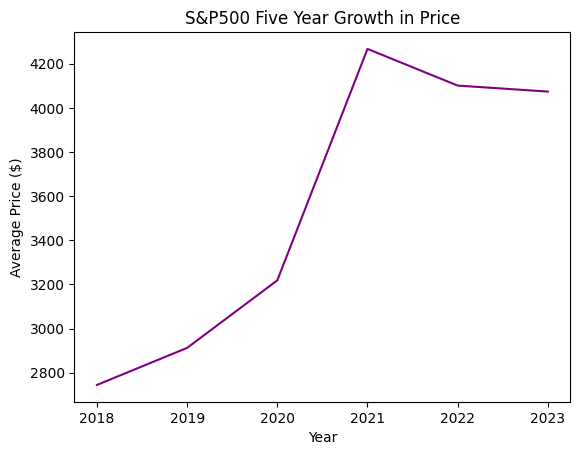

In [ ]:
# Creating the plot for the S&P500
plt.plot(list(sorted(set(sp_fives))), sp_avgs, color='Purple')
plt.ylabel('Average Price ($)')
plt.xlabel('Year')
plt.title('S&P500 Five Year Growth in Price')
plt.show()

This plot shows the 5 year growth of the S&P500 index fund which encompasses majority of companies of stock market so this is a good measure to see how the market has done in the last 5 years

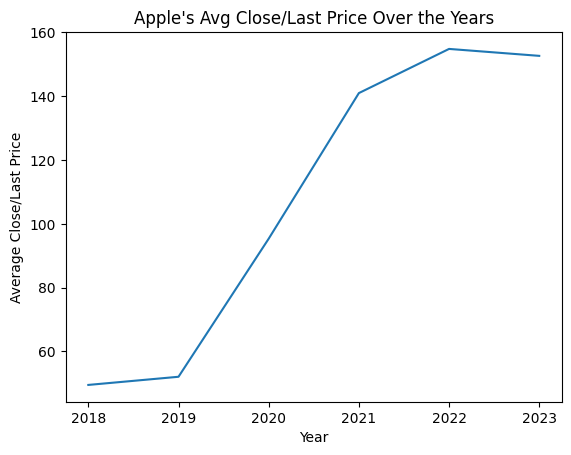

In [ ]:
# Creating the plot for Apple
plt.plot(list(sorted(set(apple_years))), apple_avgs)
plt.ylabel("Average Close/Last Price")
plt.xlabel("Year")
plt.title("Apple's Avg Close/Last Price Over the Years")
plt.show()

This plot shows the 5 year growth of the company Apple and from this plot we can see they have had a steady growth upwards which makes sense being one of the leading tech companies in the world 

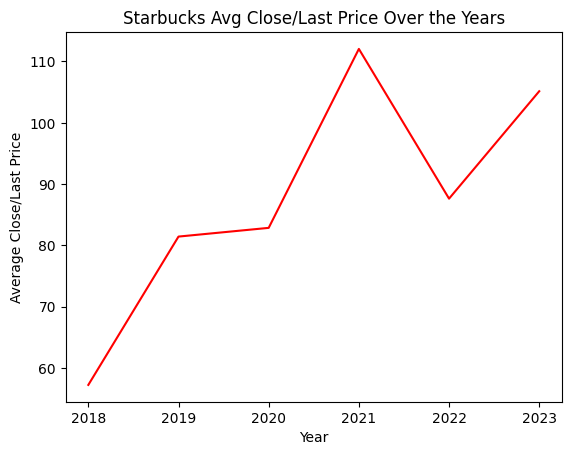

In [ ]:
# Creating the plot for Starbucks
plt.plot(list(sorted(set(starbucks_years))), starbucks_avgs, color='red')
plt.ylabel("Average Close/Last Price")
plt.xlabel("Year")
plt.title("Starbucks Avg Close/Last Price Over the Years")
plt.show()

As one of the leading coffee shops in the world, the growth of the company Starbucks is quite interesting. They have many spikes in their prices which shows fluctuation in their closing prices. They also took a dip in the year 2022 but seem to be on a steady growth upwards now

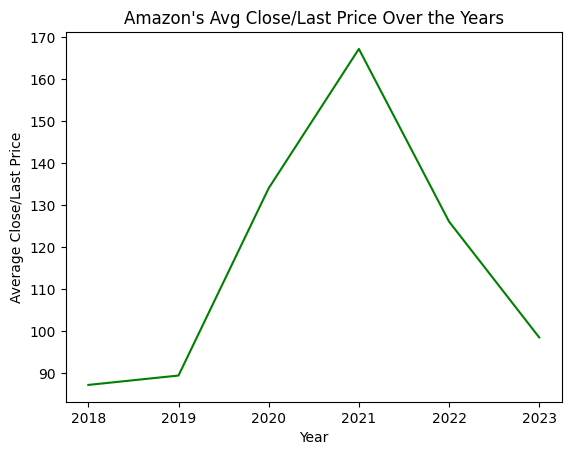

In [ ]:
# Creating the plot for Amazon
plt.plot(list(sorted(set(amazon_years))), amazon_avgs, color='green')
plt.ylabel("Average Close/Last Price")
plt.xlabel("Year")
plt.title("Amazon's Avg Close/Last Price Over the Years")
plt.show()

Being one of the biggest companies in the world, the 5 year average for Amazon is something we did not expect. However this could be due to COVID-19 because we can see the dip starts in 2021 which is when COVID became more relevant and detrimental to the world
* https://www.aboutamazon.com/news/company-news/amazons-covid-19-blog-updates-on-how-were-responding-to-the-crisis

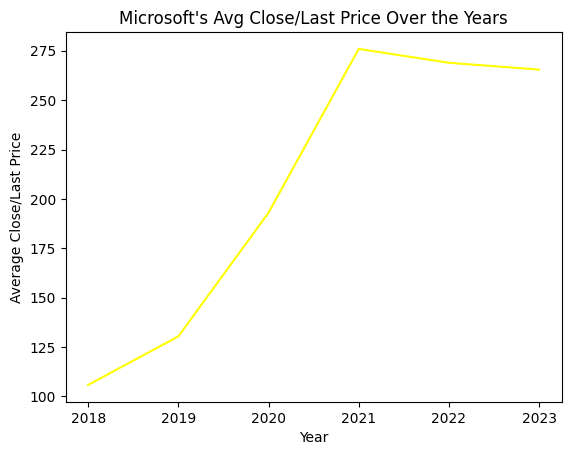

In [ ]:
# Creating the plot for Microsoft
plt.plot(list(sorted(set(microsoft_years))), microsoft_avgs, color='yellow')
plt.ylabel("Average Close/Last Price")
plt.xlabel("Year")
plt.title("Microsoft's Avg Close/Last Price Over the Years")
plt.show()

In this plot we can see the growth of Microsoft which is historically known as a reliable tech company providing the public with great software and laptops. From this graph we notice that the growth for Microsoft has been very steady with a small dip after 2021 but even after that they have remained steady and above $250 for their close price 

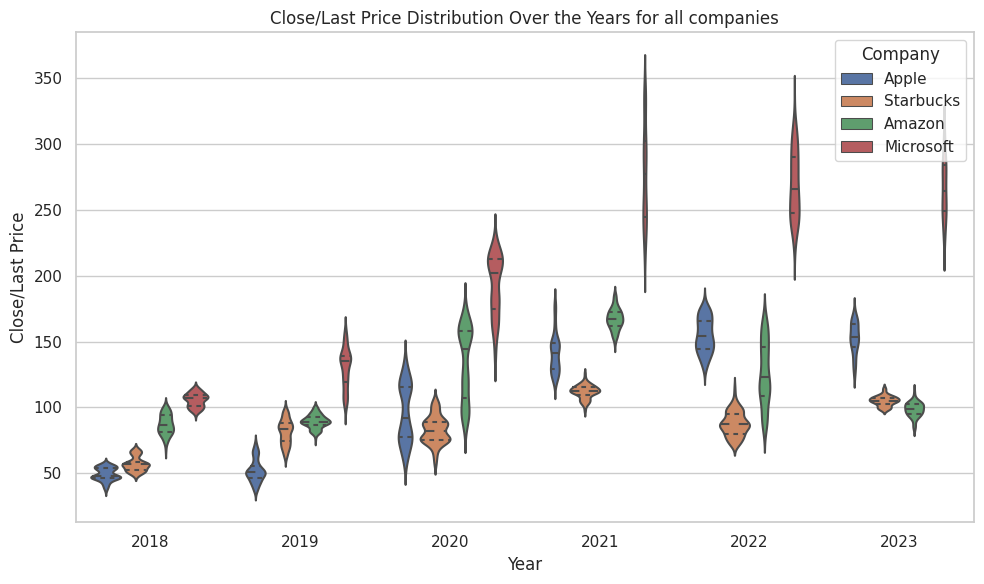

In [ ]:
# Add 'Company' column to individual company datasets
apple['Company'] = 'Apple'
starbucks['Company'] = 'Starbucks'
amazon['Company'] = 'Amazon'
microsoft['Company'] = 'Microsoft'

# Combine the data for all companies
data = pd.concat([apple, starbucks, amazon, microsoft])

# Convert 'Year' and 'Close/Last' columns to numeric
data['Year'] = pd.to_numeric(data['Year'])
data['Close/Last'] = data['Close/Last'].str.replace('$', '', regex=False).astype(float)

# Set up the plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=data, x='Year', y='Close/Last', hue='Company', inner='quartile')
plt.xlabel('Year')
plt.ylabel('Close/Last Price')
plt.title('Close/Last Price Distribution Over the Years for all companies')
plt.legend(title='Company')

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()

This violin plot shows us the close/last price distribution over the last 5 years. The width of the violins shows us the variability of prices and we can see that violins that are narrower are more stable and less likely to fluctuate. The height of the violins determines the range of prices; the taller the plot, the broader the range of prices observed for that year. Over the years, we can see companies like microsoft having less fluctuation in stock prices, especially in 2021. In addition, we can also see companies like starbucks have consistent price volatility throughout the years.

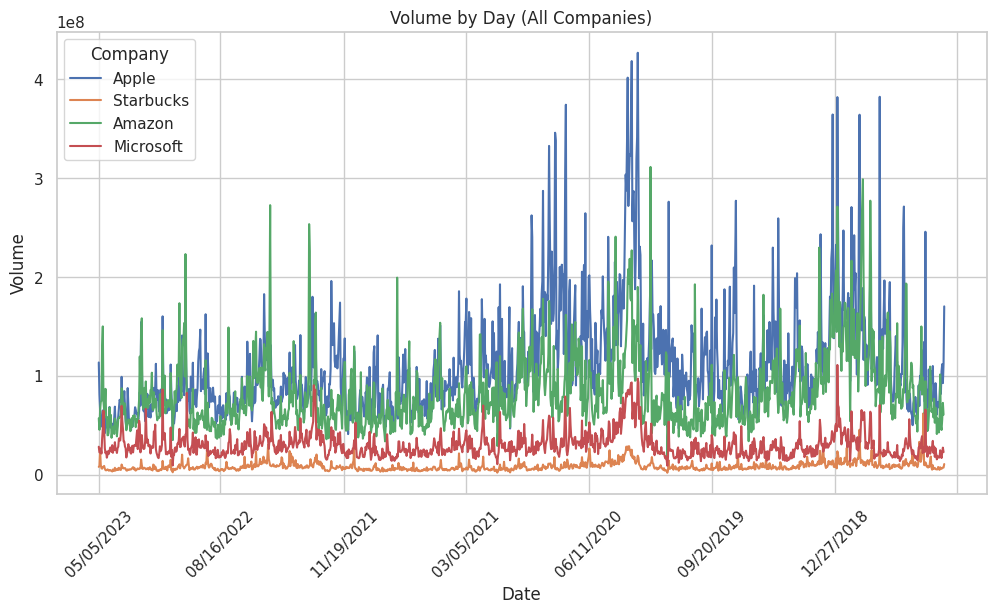

In [ ]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Create the volume graph
sns.lineplot(data=data, x='Date', y='Volume', hue='Company')

# Set the x-axis labels to display every 6 months
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume by Day (All Companies)')

# Show the plot
plt.show()

This graph shows us the trading volume of stocks over given period of time. The overall volume tells us the ease of being able to trade with that stock. Higher volumes such as Amazon and Apple have greater liquidity and drive more trading compared to companies like starbucks. Spikes in the graphs show us days with lots of trading activity and this can be caused by big events. For example, the beginning of 2020 had caused apple stock to more than double and created a record fiscal year. This can be attributed to COVID causing people to stay home and focus more on their iphones and macs.
* https://www.investopedia.com/how-covid-affects-apple-aapl-5198334

The tables we previously constructed are being displayed here after cleaning and sorting values

In [ ]:
market_cap_df

,Company,Market Cap (Trillion)
0,Starbucks,0.12263
1,Amazon,1.15100
2,Microsoft,2.30600
3,Apple,2.73300


We can see in the table above that the market cap is ranked from least to greatest. Apple having the highest market cap and Starbucks having the lowest. This tells us that investors are more likely to invest in Apple more than Starbucks 

In [ ]:
prev_close_df

,Company,Prev Close Price
0,Starbucks,106.44
1,Amazon,110.19
2,Apple,173.55
3,Microsoft,312.31


From this table we can see the previous close price of each company and we notice that Microsoft has the higest close price out of all the companies which shows they currently have the higest stock price even though they are not the 'biggest' company on this list

In [ ]:
def plotYear(df, year, ax):
  y = df[df['Date'].str[6:] == year]['Open'].iloc[::-1].values
  x = np.arange(len(y))
  m, b = np.polyfit(x, y, 1)
  ax.plot(x, y)
  ax.plot(x, m*x+b)
  ax.set_title(year)
  ax.set_ylabel("Price")
  ax.set_xlabel("Days")

Apple's value saw a decline in 2015 compared to previous years, due to suspicions among shareholders of iPhone market saturation. Although this decline was not reflected in our previous plots since they only displayed a 5 year average, it is clear that Apple's stock price started out a lot lower than we currently see now even back in 2018
* https://time.com/4484791/apple-stock-aapl-iphone-7/

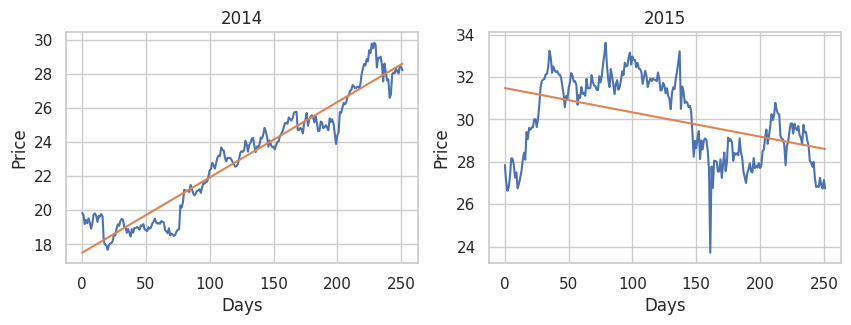

In [ ]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plotYear(dataset, '2014', ax)
plotYear(dataset, '2015', ax2)

Amazon saw high levels of growth during 2020 and this is probably due to the pandemic. Since most people were stuck at home, they relied on online shopping to get their daily needs as most grocery stores were closed and majority of counties were on lockdown preventing citizens from going outside 

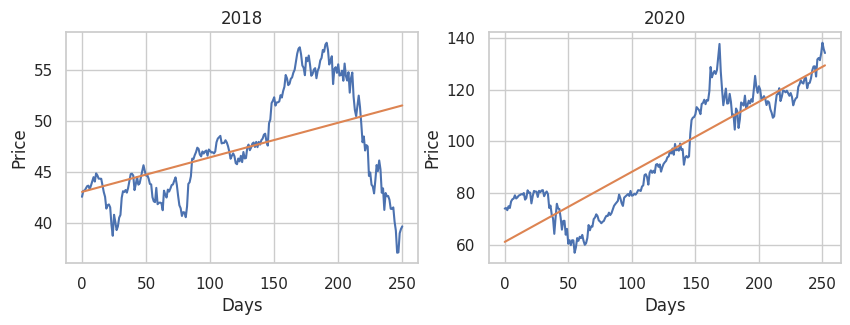

In [ ]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plotYear(dataset, '2018', ax)
plotYear(dataset, '2020', ax2)

# Machine Learning and Hypothesis Testing:

In [ ]:
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api

#Hypothesis Testing:

Suppose we wish to conduct a hypothesis test in order to test the correlation between 2 different variables: trading volume and closing price. In other words, we wish to see if the price of a stock has an affect on it's volume traded. Our Null Hypothesis (H0) is the idea that stock price has no bearing on it's overall trading volume. The null hypothesis is the hypothesis that there is no signifigant correlation between 2 variables. Our Alternate Hypothesis is the idea that there is a correlation between stock price and trading value. The alternate hypothesis is a statement that contradicts the null hypothesis and suggests a significant difference or relationship between variables being studied. For our case, we will be conducting hypothesis tests to see if there is a relationship between stock price and trading volume for the companies Apple and Amazon. 


Here we will be plotting the close price of Amazon's stock (x axis) against the trading volume of the Amazon stock (y-axis). We will be fitting a regression line to this plot in order to better analyze the underlying trend of the data and visualize the overall correlation between the 2 variables. 

In [ ]:
dataset = pd.read_csv('HistoricalData_1683500505754.csv')
dataset2 = pd.read_csv('HistoricalData_1683662795655.csv')
dataset3 = pd.read_csv('HistoricalData_1683660938225.csv')
# Data Pre-Prcessing:
dataset.rename(columns = {'Close/Last':'Close'}, inplace = True)
cols = dataset.columns.tolist()
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dataset = dataset[cols]

dataset['Open'] = dataset['Open'].apply(process_values)
dataset['High'] = dataset['High'].apply(process_values)
dataset['Low'] = dataset['Low'].apply(process_values)
dataset['Close'] = dataset['Close'].apply(process_values)

# Data Pre-Prcessing:
dataset2.rename(columns = {'Close/Last':'Close'}, inplace = True)
cols = dataset2.columns.tolist()
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dataset2 = dataset2[cols]

dataset2['Open'] = dataset2['Open'].apply(process_values)
dataset2['High'] = dataset2['High'].apply(process_values)
dataset2['Low'] = dataset2['Low'].apply(process_values)
dataset2['Close'] = dataset2['Close'].apply(process_values)

# Data Pre-Prcessing:
dataset3.rename(columns = {'Close/Last':'Close'}, inplace = True)
cols = dataset3.columns.tolist()
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dataset3 = dataset3[cols]

dataset3['Open'] = dataset3['Open'].apply(process_values)
dataset3['High'] = dataset3['High'].apply(process_values)
dataset3['Low'] = dataset3['Low'].apply(process_values)
dataset3['Close'] = dataset3['Close'].apply(process_values)

lets take a look at the start of these datasets so we can see what they really look like 

In [ ]:
print(dataset2.head())
print('')
print(dataset3.head())

         Date     Open     High       Low    Close    Volume
0  05/08/2023  105.040  106.095  104.7001  105.830  49430910
1  05/05/2023  104.270  105.760  103.5500  105.655  56951740
2  05/04/2023  104.040  105.390  103.3117  104.000  45345520
3  05/03/2023  103.735  105.960  103.2800  103.650  65051930
4  05/02/2023  101.470  103.900  101.1500  103.630  73469350

         Date     Open    High     Low   Close     Volume
0  05/08/2023  172.480  173.85  172.11  173.50   55962790
1  05/05/2023  170.975  174.30  170.76  173.57  113453200
2  05/04/2023  164.890  167.04  164.31  165.79   81235430
3  05/03/2023  169.500  170.92  167.16  167.45   65136020
4  05/02/2023  170.090  170.35  167.54  168.54   48425700


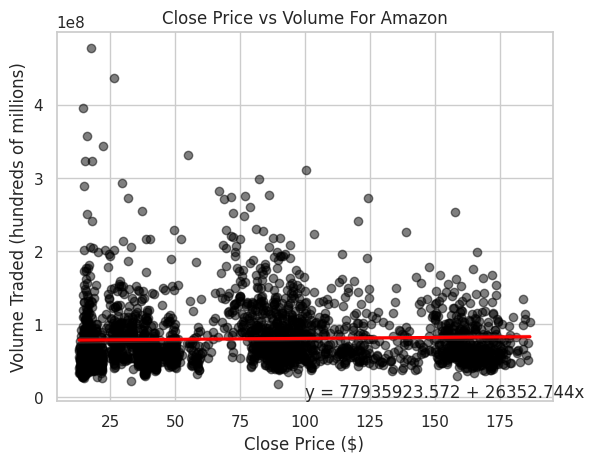

In [ ]:
# AMAZON PLOT
plot = sns.regplot(x=dataset2["Close"], y=dataset2["Volume"],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99)
plt.title('Close Price vs Volume For Amazon')
slope, intercept, r, plot, sterr = scipy.stats.linregress(x=plot.get_lines()[0].get_xdata(), 
                                            y=plot.get_lines()[0].get_ydata())

plt.text(100, 95, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')

plt.xlabel('Close Price ($)')
plt.ylabel('Volume Traded (hundreds of millions)')
plt.show()

Below we will be conducting an OLS regression. OLS regressions typically provide information on the relationship between a dependent variable and independent variables, including coefficients, standard errors, t-values, p-values, R-squared values, residuals, and diagnostic statistics. Here in this example we will be conducting an OLS Regression in order to see if there is a a p value < 0.05, which reason that the correlation between close price of a stock and volume traded is statistically signifigant. Below we see in the chart that the p-value is 0. Since 0 is < 0.05, we can reject the Null Hypothesis and accept the alternate hypothesis which we previously mentioned states tha there is a statistically signifigant correlation between close price and trading volume.

In [ ]:
ret = statsmodels.formula.api.ols(formula="Close ~ Volume", data=dataset2).fit()
print(ret.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.750
Date:                Fri, 12 May 2023   Prob (F-statistic):             0.0974
Time:                        03:53:11   Log-Likelihood:                -13525.
No. Observations:                2517   AIC:                         2.705e+04
Df Residuals:                    2515   BIC:                         2.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.4415      2.253     32.598      0.0

Here we will be plotting the close price of Apple's stock (x axis) against the trading volume of the Amazon stock (y-axis). We will be fitting a regression line to this plot in order to better analyze the underlying trend of the data and visualize the overall correlation between the 2 variables.  

Here we will be plotting the close price of Amazon's stock (x axis) against the trading volume of the Amazon stock (y-axis). We will be fitting a regression line to this plot in order to better analyze the underlying trend of the data and visualize the overall correlation between the 2 variables.

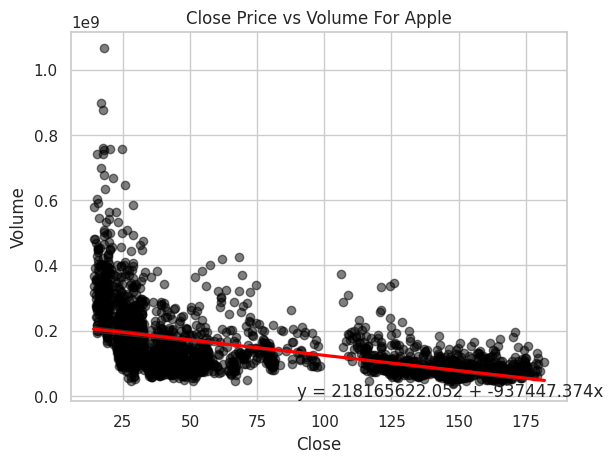

In [ ]:
# APPLE PLOT
plot= sns.regplot(x=dataset3["Close"], y=dataset3["Volume"],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99)
plt.title('Close Price vs Volume For Apple')
slope, intercept, r, plot, sterr = scipy.stats.linregress(x=plot.get_lines()[0].get_xdata(),
                                                       y=plot.get_lines()[0].get_ydata())

plt.text(90, 30000, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')

plt.show()

Below we will be conducting an OLS regression. OLS regressions typically provide information on the relationship between a dependent variable and independent variables, including coefficients, standard errors, t-values, p-values, R-squared values, residuals, and diagnostic statistics. Here in this example we will be conducting an OLS Regression in order to see if there is a a p value < 0.05, which reason that the correlation between close price of a stock and volume traded is statistically signifigant. Below we see in the chart that the p-value is 0. Since 0 is < 0.05, we can reject the Null Hypothesis and accept the alternate hypothesis which we previously mentioned states tha there is a statistically signifigant correlation between close price and trading volume.

In [ ]:
ret = statsmodels.formula.api.ols(formula="Close ~ Volume", data=dataset2).fit()
print(ret.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.750
Date:                Fri, 12 May 2023   Prob (F-statistic):             0.0974
Time:                        03:53:18   Log-Likelihood:                -13525.
No. Observations:                2517   AIC:                         2.705e+04
Df Residuals:                    2515   BIC:                         2.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.4415      2.253     32.598      0.0

#Machine Learning:

Here we extract the specific column that we will be using to make our predictions- the opening price column of the dataframe. We will be etracting this column of the dataframe as a list and storing it in the training set. Then we pring oout the training set and it's shape so that we can confirm they are the right size inputs for our model. 

In [ ]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[16.6061]
 [16.3943]
 [16.4218]
 ...
 [41.345 ]
 [41.5   ]
 [40.1   ]]
(1418, 1)


Lets start by fitting an ARIMA (Autoregressive Integrated Moving Average) model to our data, as a baseline to compare against more powerful models. 

In [1]:
from pmdarima.arima import ARIMA

This code segment trains an ARIMA model with order (p=4, d=1, q=3) on the training set and then outputs the summary of the trained model, which provides information about the model's performance and statistical properties.

The order parameter specifies the number of autoregressive (p), differencing (d), and moving average (q) terms in the model, respectively. In this case, order=[4, 1, 3] means that the model has four autoregressive terms, one differencing term, and three moving average terms.

The fit method is used to fit the ARIMA model to the training set.

In [ ]:
model = ARIMA(order=[4, 1, 3])
model.fit(training_set)
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1418
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -1068.760
Date:                Fri, 12 May 2023   AIC                           2155.520
Time:                        03:53:39   BIC                           2202.826
Sample:                             0   HQIC                          2173.193
                               - 1418                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0034      0.009      0.365      0.715      -0.015       0.022
ar.L1         -0.8028      0.131     -6.115      0.000      -1.060      -0.546
ar.L2          0.4841      0.219      2.212      0.027       0.055       0.913
ar.L3          0.9943      0.142      7.004      0.000       0.716       1.273
ar.L4          0.1173      0.020      5.957      0.000       0.079       0.156
ma.L1          0.6865      0.133      5.174      0.000       0.426       0.946
ma.L2         -0.5801      0.211     -2.743      0.006      -0.995      -0.166
ma.L3         -0.8978      0.126     -7.121      0.000      -1.145      -0.651
sigma2         0.2648      0.005     50.794      0.000       0.255       0.275
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              3347.13
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               3.77   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The above code plots the actual Apple stock price in red and the predicted Apple stock price in blue based on the trained ARIMA model. The plot is labeled with a title, x-axis label, y-axis label, and a legend showing which line corresponds to the actual stock price and which line corresponds to the predicted stock price.

Here we plot actual stock price vs predicted stock price for the ARIMA model
This model plots predictions for stock market performance from the year 2016 until the year 2023. Notice how the model fits the data very well until around the 1500 day mark. This means the model seems to be undererfitting starting from early 2021. We are using this model as a preliminary insight into using ML to predict stock prices in order to get you thinking about practical applications and get you thinking about what a machine learning model might actually look like. We will discuss the phenomena uncovered by this model in the next section on LSTM models. 

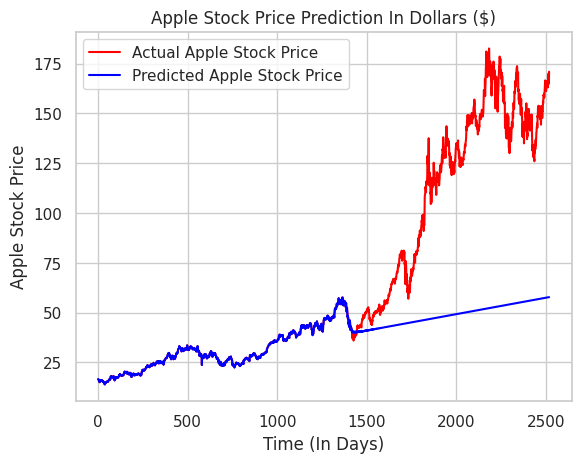

In [ ]:
plt.plot(dataset.iloc[::-1].iloc[:,1:2].values, color = 'red', label = 'Actual Apple Stock Price') 
plt.plot(np.append(training_set, model.predict(n_periods = 1100)), color = 'blue', label = 'Predicted Apple Stock Price') 
plt.title('Apple Stock Price Prediction In Dollars ($)')
plt.xlabel('Time (In Days)')
plt.ylabel('Apple Stock Price')
plt.legend() 

Referenced Code and Information for the LSTM Model was take from the following sites:

https://www.analyticsvidhya.com/blog/2022/01/the-complete-lstm-tutorial-with-implementation/

https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba 

https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning

Before we begin, lets discuss what the LSTM model is in machine learning:<br>
An LSTM (Long Short-Term Memory) model is a type of recurrent neural network that is designed to handle long-term dependencies in sequence data. The model uses a combination of gating mechanisms and memory cells to selectively remember or forget information at each time step, which allows it to capture important patterns in the input data over longer time periods. LSTM models have been widely used for a variety of tasks, including natural language processing, speech recognition, and time series forecasting.

Here we normalize the Data. This means we are basically squishing all of the data #between 0 and 1 so that it can be easily compared later on in other part of our model and for our own analysis. Take a look below at how the values look differnt now after having all been squished between 0 and 1. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.06013555],
       [0.05529085],
       [0.05591989],
       ...,
       [0.62601131],
       [0.62955677],
       [0.59753328]])

Here we create 2 lists which we will be using as inputs to our machine learning model: x_train and y_train. Here we populate these lists in batches of 60 elements. Keep in mind, the data we will be using here has already been preprocessed in the data processing section. Note: this data is for the company, Apple.

In [ ]:
x_train = []
y_train = []

for i in range (60,len(dataset_train)):
  x_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])
  
x_train= np.array(x_train)
y_train= np.array(y_train)

Visualize the x_train and y_train lists

In [ ]:
print(x_train)
print(y_train)

[[0.06013555 0.05529085 0.05591989 ... 0.04039078 0.04787284 0.051981  ]
 [0.05529085 0.05591989 0.05441707 ... 0.04787284 0.051981   0.05260545]
 [0.05591989 0.05441707 0.04914005 ... 0.051981   0.05260545 0.05444909]
 ...
 [0.94281519 0.92017    0.93692515 ... 0.65523275 0.64671222 0.62641161]
 [0.92017    0.93692515 0.94407325 ... 0.64671222 0.62641161 0.62601131]
 [0.93692515 0.94407325 0.96019937 ... 0.62641161 0.62601131 0.62955677]]
[0.05260545 0.05444909 0.05990681 ... 0.62601131 0.62955677 0.59753328]


Here we see the shapes of x_train and y_train. Seeing these, we can confirm the shapes of these liests are exactly what we require to pass into the model as imputs. 


In [ ]:
print(x_train.shape)
print(y_train.shape)

(1358, 60)
(1358,)


Here we will be reshaping the x_train to include a 3rd dimention of size 1. This is to correct the shape of x_train so that it is able to be passed into the model properly as an imput that the model can take in. 


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1358, 60, 1)

Here we make a couple import statemsnts so we can use some prebuilt libraries that will make it easier for us to train and deploy our models. 

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

This code segment is defining a deep learning model architecture for regression using Long Short-Term Memory (LSTM) neural networks. The model is being built using the Keras Sequential API, which allows for building neural networks layer by layer.

The first layer is an LSTM layer with 50 units, which takes input with shape (x_train.shape[1], 1) and returns a sequence of outputs for each input time step. The 'return_sequences' parameter is set to True, which means that the output of this layer is fed as input to the next LSTM layer.

After the first LSTM layer, a dropout layer is added with a dropout rate of 0.2. This helps prevent overfitting by randomly dropping out (setting to zero) some of the output values of the previous layer during training. This is used to prevent the codependency of variables during the training process. 

The same pattern is repeated for the next four LSTM layers, each with 50 units each, and a dropout rate of 0.2.

Finally, a dense layer is added with one output unit, which will be used to predict the target variable for the regression task.

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50))
regressor.add (Dropout (0.2))

regressor.add(Dense (units=1))

This code segment compiles and trains a previously defined deep learning model for regression using the Keras Sequential API. The model is trained using the Adam optimizer and mean squared error (MSE) loss function, and is fit to the training data with a 100 epochs and a batch size of 32. This model is an example for the company Amazon.






In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)            

Epoch 1/100
43/43 [==============================] - 10s 17ms/step - loss: 0.0292
Epoch 2/100
43/43 [==============================] - 1s 15ms/step - loss: 0.0045
Epoch 3/100
43/43 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 4/100
43/43 [==============================] - 1s 15ms/step - loss: 0.0043
Epoch 5/100
43/43 [==============================] - 1s 14ms/step - loss: 0.0039
Epoch 6/100
43/43 [==============================] - 1s 15ms/step - loss: 0.0037
Epoch 7/100
43/43 [==============================] - 1s 14ms/step - loss: 0.0036
Epoch 8/100
43/43 [==============================] - 1s 14ms/step - loss: 0.0035
Epoch 9/100
43/43 [==============================] - 1s 15ms/step - loss: 0.0039
Epoch 10/100
43/43 [==============================] - 1s 14ms/step - loss: 0.0032
Epoch 11/100
43/43 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 12/100
43/43 [==============================] - 1s 15ms/step - loss: 0.0031
Epoch 13/100
43/43 [====

Above, we have seen that the mean squared error loss for the model's training is 0.0011. This means that our model fits exceptionaly well on the training data. However, it is important to note that often times such a phenomena, where the data fits too well on the training data could lead to problems where the model actually ends up overfitting on the training data and performing more poorly on the test data. We will be able to see if this is the case when we plot the model predictions against the actual market data. 

Here we take the the actual stock prices over time from the test dataset for the opening stock prices. Taking this allows us to plot these values against the predictions of our model so we can visualize how well our model predicts values. 

In [ ]:
actual_stock_price = dataset_test.iloc[:,1:2].values
print(dataset_test)

            Date      Open      High       Low     Close     Volume
1099  12/21/2018   39.2150   39.5400   37.4075   37.6825  381991600
1098  12/24/2018   37.0375   37.8875   36.6475   36.7075  148676920
1097  12/26/2018   37.0750   39.3075   36.6800   39.2925  232535400
1096  12/27/2018   38.9600   39.1925   37.5175   39.0375  206435400
1095  12/28/2018   39.3750   39.6300   38.6375   39.0575  166962400
...          ...       ...       ...       ...       ...        ...
4     05/01/2023  169.2800  170.4500  168.6400  169.5900   52472940
3     05/02/2023  170.0900  170.3500  167.5400  168.5400   48425700
2     05/03/2023  169.5000  170.9200  167.1600  167.4500   65136020
1     05/04/2023  164.8900  167.0400  164.3100  165.7900   81235430
0     05/05/2023  170.9750  174.3000  170.7600  173.5700  113453200

[1100 rows x 6 columns]


This code segment prepares the test data for a deep learning model for time series prediction. First, the training and test data are concatenated vertically. Next, the last 60 data points are extracted as inputs and reshaped into a two-dimensional numpy array, then scaled using the previously defined scaler object. Finally, a list of numpy arrays is created containing 60 consecutive values from the input data, which is then reshaped to a three-dimensional shape suitable for input to the trained LSTM model.

In [ ]:
dataset_total = pd.concat((dataset_train [ 'Open'], dataset_test['Open']), axis=0)
inputs = dataset_total [len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60,len(dataset_test)):
  x_test.append(inputs [i-60:i, 0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

First, the trained LSTM model is used to predict the stock price for the test data by calling the predict method on the regressor object, passing in x_test as the input. The predicted stock price is stored in the predicted_stock_price variable.

Next, the predicted_stock_price is rescaled to the original range of the data using the scaler.inverse_transform method. The rescaled predictions are stored back in the predicted_stock_price variable, and can now be compared with the actual stock prices to evaluate the performance of the model.

In [ ]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

33/33 [==============================] - 2s 9ms/step


Here we have a helper function that will be used to calculate mean squared error of our predicted data versus the actual data.

In [ ]:
import numpy as np

def mean_squared_error(y_true, y_pred):
  mse = np.mean((y_true - y_pred)**2)
  return mse


This line of code calculates the mean squared error (MSE) between the actual stock prices and the predicted stock prices using the mean_squared_error function which was defined above for Apple. 

In [ ]:
mean_squared_error(actual_stock_price[:-60],predicted_stock_price)

2576.064135919605

We can cleasrly see that the MSE error otherwise known as the L2 loss/norm is quite high and thus the model does not fit the test data very well. However, vidually speaking, we can see that our model fits the test data quite well right up until quarantine, at which point it is no longer able to provide accurate predictions. 

Here we plot the predicted stock prices for Apple's stick against it's actual stock prediction. On the x axis, we show the number of days since January 1st 2019 and on the x axis, we have Apple's stock price. The red line represents Apple's actual stock price in this timeframe, and the blue line represents the predicted stock price in this timeframe. 


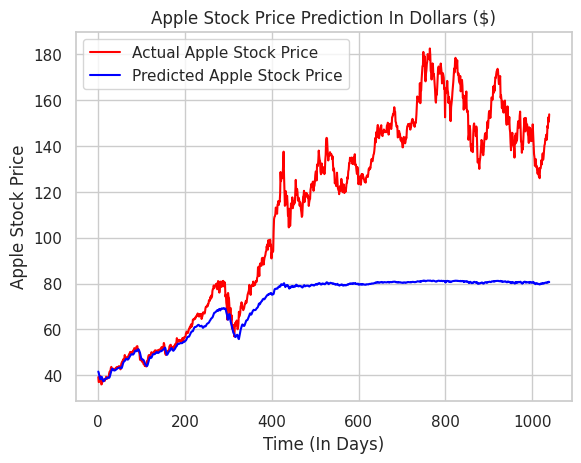

In [ ]:
plt.plot(actual_stock_price[:-60], color = 'red', label = 'Actual Apple Stock Price') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price') 
plt.title('Apple Stock Price Prediction In Dollars ($)')
plt.xlabel('Time (In Days)')
plt.ylabel('Apple Stock Price')
plt.legend() 

It is important to note that we note that looking at the MSE calculation above that we can note that the that there is a signifigant variation between actual and predicted stock prices. This can be easily explained. The apple stock fits the test data swill until around 400 days since January 1st, 2019. This maps to Febuary of 2020. This corresponds exactly with the time of the advent of the coronavirus and quarantine. During this time, Apple's stock soared by 67.5% due to unusal market circumstances. With a model such as this, which aims to predict stock prices over time, it is difficult to accurately model the impact that outiside news will have on the training of the model. The training data for the model was not able to be split in such a way that it would be trained on data from during quarantine (since the model was trained all on data from pre quarantine). This means that no amount of additional hyperparameter tuning would be able to make our model more readonably accurate since it would be impossible for us to predict quarantime trends with our model given the scope of this tutorial. 
https://www.google.com/search?q=how+much+did+appels+stock+increase+over+the+pandemic&rlz=1C5CHFA_enUS1039US1042&oq=how+much+did+appels+stock+increase+over+the+pandemic&aqs=chrome..69i57j33i10i160.9892j0j7&sourceid=chrome&ie=UTF-8

The Following code is the same as that for the previous LTSM model for APPLE. The only change here is we will be experimenting with a higher dropout value (0.3 instead of 0.2) and we will be working with data for Amazon as opposed to Apple. 

In [ ]:
dataset=pd.read_csv('/content/HistoricalData_1683662795655.csv')

# Data Pre-Prcessing:
dataset.rename(columns = {'Close/Last':'Close'}, inplace = True)
cols = dataset.columns.tolist()
cols= ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dataset= dataset[cols]

dataset['Open'] = dataset['Open'].apply(process_values)
dataset['High'] = dataset['High'].apply(process_values)
dataset['Low'] = dataset['Low'].apply(process_values)
dataset['Close'] = dataset['Close'].apply(process_values)

# Split the data into a pre 2020  set and a post
dataset_train= dataset[855:]
dataset_test= dataset[0:855]

dataset_train= dataset_train.iloc[::-1]
dataset_test= dataset_test.iloc[::-1]

training_set = dataset_train.iloc[:,1:2].values

print(training_set)
scaler= MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

x_train= []
y_train= []

for i in range (60,len(dataset_train)):
  x_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])
x_train= np.array(x_train)
y_train= np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

regressor= Sequential()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout (0.3))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout (0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout (0.3))

regressor.add(LSTM(units = 50))
regressor.add (Dropout (0.3))

regressor.add(Dense (units=1))

regressor.compile(optimizer = 'adam', loss= 'mean_squared_error')
regressor.fit(x_train, y_train, epochs= 100, batch_size= 32)
         
actual_stock_price = dataset_test.iloc[:,1:2].values

dataset_total= pd.concat((dataset_train [ 'Open'], dataset_test['Open']), axis = 0)
inputs= dataset_total [len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60,len(dataset_test)):
  x_test.append(inputs [i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_price= regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

[[12.9365]
 [13.044 ]
 [13.1385]
 ...
 [87.37  ]
 [87.0835]
 [87.5   ]]
Epoch 1/100
51/51 [==============================] - 10s 22ms/step - loss: 0.0384
Epoch 2/100
51/51 [==============================] - 1s 23ms/step - loss: 0.0069
Epoch 3/100
51/51 [==============================] - 1s 17ms/step - loss: 0.0060
Epoch 4/100
51/51 [==============================] - 1s 16ms/step - loss: 0.0052
Epoch 5/100
51/51 [==============================] - 1s 15ms/step - loss: 0.0046
Epoch 6/100
51/51 [==============================] - 1s 16ms/step - loss: 0.0041
Epoch 7/100
51/51 [==============================] - 1s 15ms/step - loss: 0.0040
Epoch 8/100
51/51 [==============================] - 1s 16ms/step - loss: 0.0043
Epoch 9/100
51/51 [==============================] - 1s 15ms/step - loss: 0.0039
Epoch 10/100
51/51 [==============================] - 1s 15ms/step - loss: 0.0038
Epoch 11/100
51/51 [==============================] - 1s 16ms/step - loss: 0.0046
Epoch 12/100
51/51 [==============

Here we plot the predicted stock prices for Apple's stick against it's actual stock prediction. On the x axis, we show the number of days since January 1st 2019 and on the x axis, we have Apple's stock price. The red line represents Apple's actual stock price in this timeframe, and the blue line represents the predicted stock price in this timeframe.

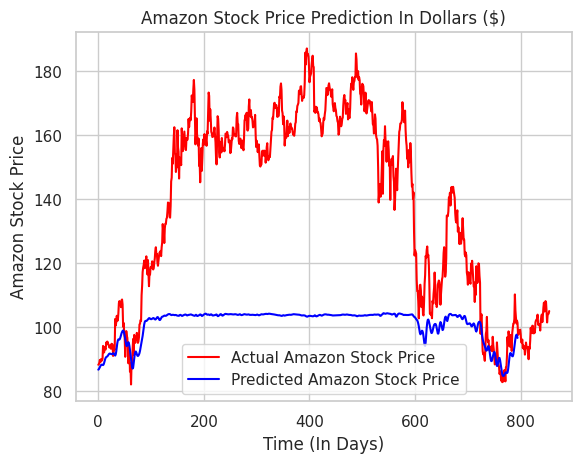

In [ ]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Amazon Stock Price') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Amazon Stock Price') 
plt.title('Amazon Stock Price Prediction In Dollars ($)')
plt.xlabel('Time (In Days)')
plt.ylabel('Amazon Stock Price') 
plt.legend()

As mentioned previously, quarantine has had a signifigant impact on the model not being able to fit the test data properly. Since this model looks at Amazon's stock prices since 2020, it makes sense that after approximately 100 days, the actual data starts increasing at a higher rate than model's predicted stock price. This is reasonable given the previous information. Like Apple, Amazon also saw it's stock price increaseby approximately 60% in the immediate year following the unusual market circumstances during the coronavirus pandemic. 

https://www.forbes.com/sites/sergeiklebnikov/2020/07/23/5-big-numbers-that-show-amazons-explosive-growth-during-the-coronavirus-pandemic/?sh=30fa2c9a4137

This line of code calculates the mean squared error (MSE) between the actual stock prices and the predicted stock prices using the mean_squared_error function which was defined above for Amazon.

In [ ]:
mean_squared_error(actual_stock_price[:-60],predicted_stock_price)

3166.8392379931297

We can cleasrly see that the MSE error otherwise known as the L2 loss/norm is quite high and thus the model does not fit the test data very well. However, vidually speaking, we can see that our model fits the test data quite well right up until quarantine, at which point it is no longer able to provide accurate predictions. 

# Insight and Conclusion

After collecting and analyzing stock data for 4 companies: Apple, Amazon, Starbucks, and Microsoft, we notice that Apple showed an overall increasing trend, having a lot of growth potential as an investment. Starbucks exhibited a relatively stable average price, suggesting a consistent performance over the years. Amazon displayed an increasing trend with some fluctuations, being highlighted as a high-growth stock. Microsoft showed a consistent upward trend with minor fluctuations, showing a lot of stability and potential for long-term investments.

Additionally, analyzing the volume by day for all companies provided insights into the different periods of trading activity and liquidity.

Overall our manipulation of 5 year data for these companies provided valuable insights into the historical performance of these companies in the stock market.

Hypothesis testing and machine learning techniques can be valuable tools in stock market analysis and prediction. Hypothesis testing allows us to reject or failed to reject hypotheses about the relationships between variables, such as the impact of certain factors on stock prices. Understandind the signifignace of correlations between such variables is essential for individuals to make informed decisions regarding what stock to buy and when to buy a given stock in order ot maximize profits. 

 Machine learning models, such as the ARIMA model and the LSTM model can be great at being used to make predictions on how stock prices will trend in the future given past patterns. However, it is important to note that for issues such as this, past stock information is not a definite indicator of future stock patterns. After all there are a number of confounding factors that can be difficult to account for in a model. Take for example news which we discussed earlier. News about a company was shown to have signiifigant effects on overall stock prices, however given that it is a qualatative factor that is hard to quantitatively predict, it is very difficult to fit a machine learning model which is able to take such things into account. 


We really hope that you learned a lot about Stock Analysis from this presentation. For more information on detailed stock anaysis' on actual companies, please take a look the following website. 

Furthermore, if you would like more information about machine learning models and their use in the context of stock proce prediction, please view the following links: 

https://builtin.com/machine-learning/machine-learning-stock-prediction#:~:text=Machine%20learning%20(ML)%20is%20playing,machine%20learning%20for%20stock%20trading.


https://dataconomy.com/2023/01/11/stock-prediction-machine-learning/

For more information on data analysis in the context of stocks, please take a look at the following link: 
https://corporatefinanceinstitute.com/resources/capital-markets/stock-analysis/#:~:text=Stock%20analysis%20helps%20traders%20to,and%20exit%20from%20the%20investments.


For similar projects that went more in depth please reference the following:
https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00333-6
